In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [184]:
covid = pd.read_csv("covid_positive")
df = pd.DataFrame(covid)
covid.head()

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
0,1,0,NaN,NaN,1,65,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,1,1.0,0.0,1,55,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,NaN,NaN,1,68,male,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,1,1,0.0,0.0,0,40,female,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0,NaN,NaN,0,64,female,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [185]:
covid.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113288 entries, 0 to 113287
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   COVID_TEST_RESULT       113288 non-null  int64  
 1   HOSPITALIZED            113288 non-null  int64  
 2   INTUBED                 75002 non-null   float64
 3   ADMITTED_TO_ICU         74994 non-null   float64
 4   DEAD                    113288 non-null  int64  
 5   AGE                     113288 non-null  int64  
 6   SEX                     113288 non-null  object 
 7   PREGNANT                46901 non-null   float64
 8   SMOKER                  112098 non-null  float64
 9   PNEUMONIA               113284 non-null  float64
 10  COPD                    112218 non-null  float64
 11  ASTHMA                  112222 non-null  float64
 12  IMMUNOSUPPRESSED        112083 non-null  float64
 13  CARDIOVASCULAR_DISEASE  112140 non-null  float64
 14  HYPERTENSION        

In [186]:
#function creating a values for age group
def grouping_age(row) -> str:
    if row['AGE'] < 18:
        val = '-18'
    elif row['AGE'] < 30:
        val = '18-30'
    elif row['AGE'] < 44:
        val = '30-44'
    elif row['AGE'] < 60:
        val = '45-60'
    else:
        val = '60+'
    return val

In [187]:
#create column "AGE_GROUP"
covid["AGE_GROUP"] = covid.apply(grouping_age, axis=1)
#move column "AGE_GROUP" next to "AGE" column
column_to_move = covid.pop('AGE_GROUP')
covid.insert(7, "AGE_GROUP", column_to_move)
covid

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,AGE_GROUP,PREGNANT,SMOKER,...,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
0,1,0,NaN,NaN,1,65,female,60+,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,1,1,1.0,0.0,1,55,male,45-60,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
2,1,0,NaN,NaN,1,68,male,60+,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
3,1,1,0.0,0.0,0,40,female,30-44,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1,0,NaN,NaN,0,64,female,60+,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113283,1,0,NaN,NaN,0,67,female,60+,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13
113284,1,1,0.0,0.0,0,77,female,60+,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,13
113285,1,0,NaN,NaN,0,70,male,60+,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13
113286,1,0,NaN,NaN,0,32,male,30-44,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13


In [188]:
all_30_44 = covid[covid['AGE_GROUP'] == '30-44']
all_45_60 = covid[covid['AGE_GROUP'] == '45-60']
all_over_60 = covid[covid['AGE_GROUP'] == '60+']

In [189]:
def tetrachoric_corr(df, feature):
    # Create a contingency table:
    contingency_table = pd.crosstab(df['DEAD'], df[feature])

    # Extract values from the contingency table:
    a = contingency_table.iloc[0,0]
    b = contingency_table.iloc[0,1]
    c = contingency_table.iloc[1,0]
    d = contingency_table.iloc[1,1]

    # Calculate the tetrachoric correlation coefficient:
    tet_corr = math.cos(math.pi / (1 + math.sqrt(a*d /b/c)))
    # print(contingency_table)
    return round(tet_corr,2)

In [190]:
age_groups = ['30-44', '45-60', '60+']
result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [191]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = all_30_44
        elif age_group == '45-60':
            df = all_45_60
        else:
            df = all_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    result_df.loc[len(result_df)] = row

In [192]:
print(result_df)

              Comorbidity  30-44  45-60   60+
0                 OBESITY  -0.02  -0.12 -0.13
1                DIABETES   0.03   0.02 -0.01
2            HYPERTENSION  -0.08  -0.06 -0.04
3  CARDIOVASCULAR_DISEASE  -0.36  -0.35 -0.22
4  CHRONIC_KIDNEY_DISEASE   0.10   0.03 -0.07
5        IMMUNOSUPPRESSED  -0.17  -0.28 -0.22
6                    COPD  -0.29  -0.25 -0.19
7                  ASTHMA  -0.52  -0.49 -0.40
8                  SMOKER  -0.37  -0.31 -0.19
9           OTHER_DISEASE  -0.27  -0.24 -0.13


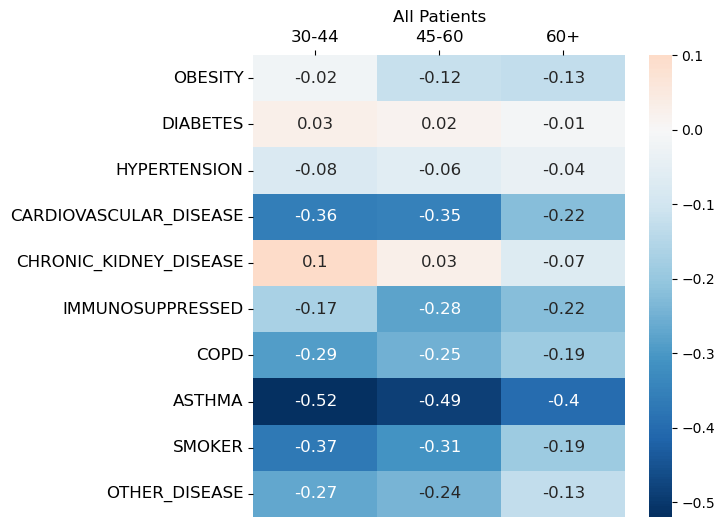

In [193]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('All Patients')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [194]:
male_30_44 = all_30_44[all_30_44['SEX'] == 'male']
male_45_60 = all_45_60[all_45_60['SEX'] == 'male']
male_over_60 = all_over_60[all_over_60['SEX'] == 'male']

female_30_44 = all_30_44[all_30_44['SEX'] == 'female']
female_45_60 = all_45_60[all_45_60['SEX'] == 'female']
female_over_60 = all_over_60[all_over_60['SEX'] == 'female']

In [195]:
age_groups = ['30-44', '45-60', '60+']
men_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [196]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = male_30_44
        elif age_group == '45-60':
            df = male_45_60
        else:
            df = male_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    men_result_df.loc[len(men_result_df)] = row

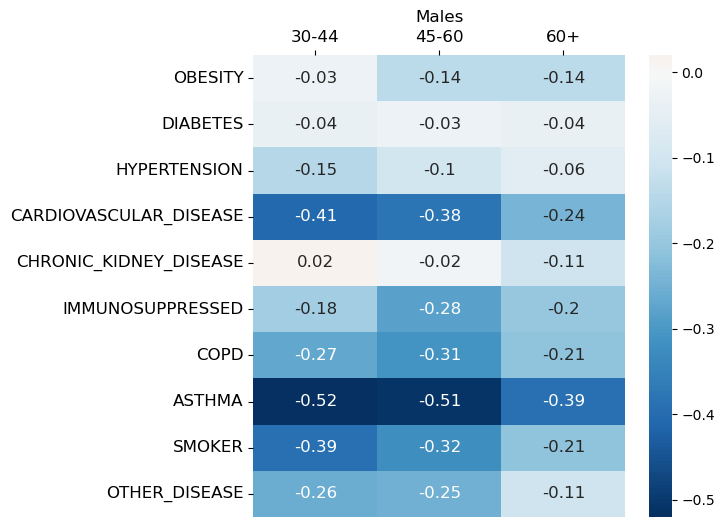

In [197]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(men_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Males')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [198]:
age_groups = ['30-44', '45-60', '60+']
women_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

In [199]:
features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = female_30_44
        elif age_group == '45-60':
            df = female_45_60
        else:
            df = female_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    women_result_df.loc[len(women_result_df)] = row

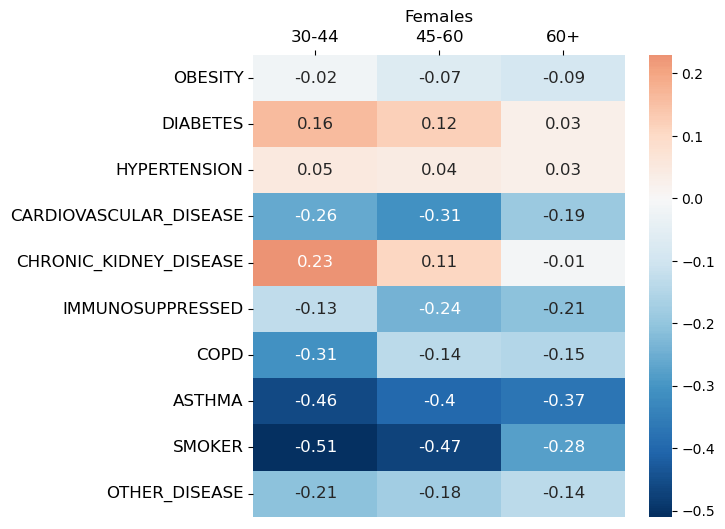

In [200]:
plt.figure(figsize=(6, 6))
ax = sns.heatmap(women_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Females')
plt.xlabel('')
plt.ylabel('')
plt.show()

**The results are counterintuitive: in most cases, there is a negative correlation between mortality and comorbidities, regardless of whether the entire population is analyzed or only males or females. Among females, only diabetes and chronic kidney disease show a weak positive correlation with mortality, but this correlation is strongest in the youngest analyzed age group (30-44) and decreases with age.**

**This suggests that other factors influence mortality. One possible factor could be the availability of medical care and treatment. Therefore, I will analyze the mortality rate in each medical unit to see if it was significantly higher in some units compared to others.**

In [201]:
med_units_covid = covid.groupby("MEDICAL_UNIT").sum()

In [202]:
med_units_covid[f'DEAD_Percentage'] = ((med_units_covid['DEAD']/med_units_covid['HOSPITALIZED'])*100).round(2)

In [203]:
cols = list(med_units_covid.columns)
# Determine the position where you want to insert the new column
insert_position = 6  # Insert the column at index 3 (4th column)

# Insert the new column at the desired position
med_units_covid = pd.concat([
    med_units_covid.iloc[:, :insert_position],
    med_units_covid['DEAD_Percentage'],
    med_units_covid.iloc[:, insert_position:]
], axis=1)
med_units_covid

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,DEAD_Percentage,SEX,AGE_GROUP,PREGNANT,...,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,DEAD_Percentage
MEDICAL_UNIT,,,,,,,,,,,,,,,,,,,,,
1,38,10,2.0,3.0,3,1668,30.00,femalemalemalefemalefemalefemalefemalefemalefe...,60+45-6060+30-4460+60+30-4418-3030-4418-3030-4...,0.0,...,0.0,1.0,1.0,2.0,5.0,2.0,7.0,2.0,1.0,30.00
2,12,5,0.0,0.0,0,271,0.00,malefemalemalefemalefemalemalefemalemalefemale...,45-6045-60-1818-3030-44-18-18-18-18-18-1845-60,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.00
3,4339,2267,540.0,289.0,1157,223800,51.04,malemalemalefemalemalemalemalemalemalefemalema...,45-6030-4460+45-6060+60+60+60+30-4460+60+60+45...,32.0,...,100.0,226.0,106.0,210.0,1564.0,212.0,1319.0,1224.0,148.0,51.04
4,44332,34119,12701.0,1156.0,26974,2560710,79.06,malemalemalemalemalemalemalemalemalemalemalema...,45-6060+45-6060+45-6060+30-4460+45-6060+60+60+...,325.0,...,2567.0,2122.0,1927.0,2899.0,19683.0,3693.0,16111.0,11810.0,4630.0,79.06
5,1858,896,64.0,27.0,416,94217,46.43,femalemalefemalemalemalemalefemalemalemalemale...,45-6045-6060+60+60+45-6060+45-6030-4460+60+60+...,50.0,...,101.0,104.0,36.0,61.0,510.0,40.0,502.0,533.0,127.0,46.43
6,10003,6795,1406.0,1108.0,4006,566370,58.96,femalemalemalefemalefemalemalemalemalefemalema...,60+30-4445-6060+45-6060+45-6060+45-6045-6045-6...,63.0,...,439.0,480.0,310.0,701.0,4098.0,636.0,3523.0,2674.0,334.0,58.96
7,364,166,13.0,18.0,26,17948,15.66,malemalemalefemalemalefemalemalemalemalemalema...,45-6045-6045-6060+60+60+30-4430-4460+45-6045-6...,1.0,...,16.0,17.0,6.0,16.0,100.0,14.0,74.0,84.0,3.0,15.66
8,3313,1987,289.0,366.0,945,182311,47.56,malemalemalefemalemalemalemalefemalemalefemale...,60+60+60+60+60+60+60+60+60+60+30-4460+60+60+60...,20.0,...,61.0,131.0,64.0,156.0,1312.0,132.0,1161.0,1762.0,93.0,47.56
9,5531,2916,646.0,991.0,875,292333,30.01,femalemalemalemalemalemalemalemalefemalemalefe...,60+60+30-4445-6030-4460+45-6060+45-6045-6045-6...,54.0,...,199.0,266.0,182.0,349.0,1834.0,240.0,1509.0,1301.0,203.0,30.01


**Mortality rates differ significantly among medical units.**
- Unit 4 has the highest mortality rate at 79.06%.
- Units 3, 6, and 13 have moderate mortality rates (50-60%).
- Units 1, 7, and 9 have the lowest mortality rates (15-30%).
- Unit 2 has a 0% mortality rate, but with only 12 patients, the sample size is too small to draw conclusions.

**There are significant differences in patient volume, with units that had the highest number of patients also showing the highest mortality rates.**

In [204]:
MED_UNIT_9 = covid[covid['MEDICAL_UNIT'] == 9]
MED_UNIT_9

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,AGE_GROUP,PREGNANT,SMOKER,...,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
64259,1,1,1.0,1.0,1,61,female,60+,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,9
64260,1,1,1.0,1.0,1,71,male,60+,NaN,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,9
64261,1,1,1.0,1.0,1,42,male,30-44,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
64262,1,1,1.0,1.0,1,44,male,45-60,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
64263,1,0,NaN,NaN,1,37,male,30-44,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69785,1,1,0.0,1.0,0,60,male,60+,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
69786,1,1,0.0,0.0,0,29,female,18-30,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,9
69787,1,1,1.0,1.0,0,56,male,45-60,NaN,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9
69788,1,1,0.0,0.0,0,61,female,60+,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9


In [205]:
MED_UNIT_9.groupby(["AGE_GROUP"]).sum()

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,PREGNANT,SMOKER,PNEUMONIA,COPD,ASTHMA,IMMUNOSUPPRESSED,CARDIOVASCULAR_DISEASE,HYPERTENSION,CHRONIC_KIDNEY_DISEASE,DIABETES,OBESITY,OTHER_DISEASE,MEDICAL_UNIT
AGE_GROUP,,,,,,,,,,,,,,,,,,,,
-18,138,43,5.0,11.0,2,1199,malefemalemalefemalemalefemalemalemalemalefema...,0.0,3.0,30.0,2.0,8.0,2.0,4.0,3.0,0.0,6.0,12.0,10.0,1242
18-30,461,127,12.0,24.0,9,11445,malemalemalemalemalemalefemalefemalemalemalefe...,16.0,95.0,130.0,3.0,49.0,15.0,11.0,28.0,10.0,20.0,95.0,20.0,4149
30-44,1129,471,76.0,135.0,61,41715,malemalemalemalemalefemalemalemalemalemalemale...,34.0,169.0,483.0,15.0,84.0,35.0,31.0,180.0,24.0,178.0,331.0,31.0,10161
45-60,1707,917,211.0,338.0,256,88069,malemalefemalemalefemalemalemalemalefemalefema...,4.0,202.0,871.0,29.0,74.0,51.0,68.0,563.0,54.0,533.0,467.0,47.0,15363
60+,2096,1358,342.0,483.0,547,149905,femalemalemalemalefemalemalefemalemalefemalema...,0.0,195.0,1193.0,150.0,51.0,79.0,235.0,1060.0,152.0,772.0,396.0,95.0,18864


In [206]:
MED_UNIT_9_30_44 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '30-44']
MED_UNIT_9_45_60 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '45-60']
MED_UNIT_9_over_60 = MED_UNIT_9[MED_UNIT_9['AGE_GROUP'] == '60+']

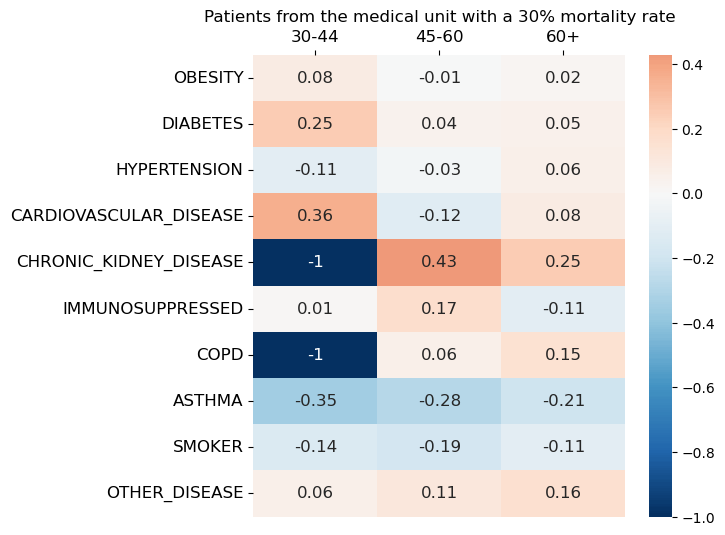

In [207]:
age_groups = ['30-44', '45-60', '60+']
MED_UNIT_9_result_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['OBESITY','DIABETES','HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = MED_UNIT_9_30_44
        elif age_group == '45-60':
            df = MED_UNIT_9_45_60
        else:
            df = MED_UNIT_9_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    MED_UNIT_9_result_df.loc[len(MED_UNIT_9_result_df)] = row

plt.figure(figsize=(6, 6))
ax = sns.heatmap(MED_UNIT_9_result_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('Patients from the medical unit with a 30% mortality rate')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [208]:
MED_UNIT_9 = MED_UNIT_9[MED_UNIT_9['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\3634100790.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


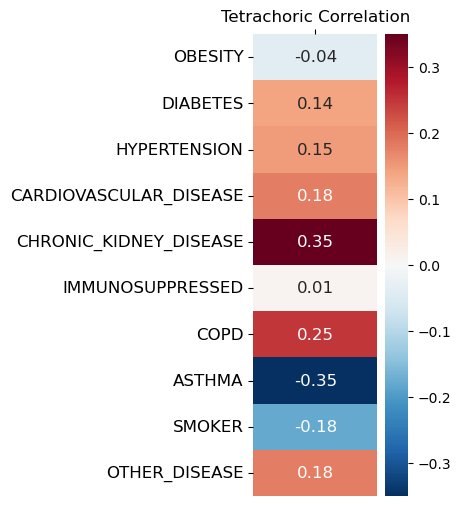

In [209]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_9_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_9, feature)
    MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_9_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**In medical units with lower mortality rates (around 30%), some comorbidities began to show a weak correlation with mortality (around 0.2–0.3):**
- Chronic kidney disease
- Cardiovascular disease
- Diabetes
- COPD

In [210]:
MED_UNIT_4 = covid[covid['MEDICAL_UNIT'] == 4]
MED_UNIT_4 = MED_UNIT_4[MED_UNIT_4['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\2807702879.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


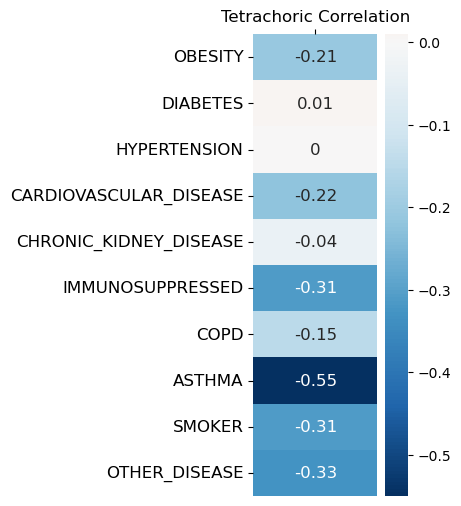

In [211]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_4_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_4, feature)
    MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_4_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**In the medical unit with the highest mortality rate (79%), comorbidities and patient-related factors did not correlate with mortality. In fact, some counterintuitive results were observed:**

- Certain conditions showed a negative correlation with mortality, such as smoking, immunosuppression (weak; -0.3), and asthma (moderate: -0.55).

In [212]:
MED_UNIT_6 = covid[covid['MEDICAL_UNIT'] == 6]
MED_UNIT_6 = MED_UNIT_6[MED_UNIT_6['AGE'] >= 30]

C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\1275892031.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


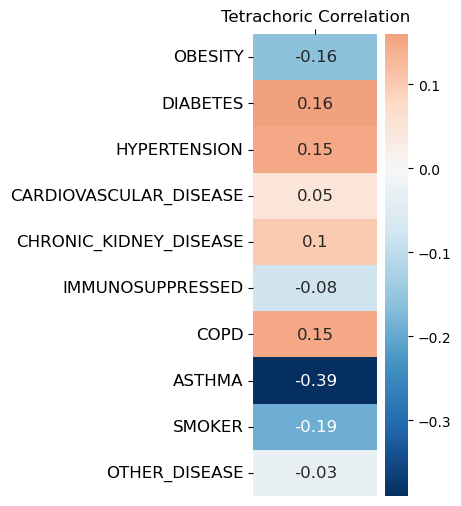

In [213]:
features = ['OBESITY', 'DIABETES', 'HYPERTENSION', 'CARDIOVASCULAR_DISEASE', 'CHRONIC_KIDNEY_DISEASE', 'IMMUNOSUPPRESSED', 'COPD', 'ASTHMA', 'SMOKER', 'OTHER_DISEASE']

# Create the result DataFrame
MED_UNIT_6_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_6, feature)
    MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_6_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**In the medical unit with a moderate mortality rate (around 50-60%), comorbidities were either not correlated or very weakly correlated with mortality. The negative correlation values were also relatively lower compared to the highest mortality unit.**

##### In the final stage of the analysis, I will examine the correlation between mortality and the presence of multiple comorbidities. This can reveal important patterns and insights, particularly since conditions like obesity, diabetes, chronic kidney disease (CKD), and hypertension often co-occur and have a cumulative effect on health outcomes.

In [224]:
all_30_44 = all_30_44.copy()

all_30_44.loc[:, 'OBESITY_DIABETES'] = ((all_30_44['OBESITY'] == 1) & (all_30_44['DIABETES'] == 1)).astype(int)
all_30_44.loc[:, 'OBESITY_HYPERTENSION'] = ((all_30_44['OBESITY'] == 1) & (all_30_44['HYPERTENSION'] == 1)).astype(int)
all_30_44.loc[:, 'DIABETES_HYPERTENSION'] = ((all_30_44['DIABETES'] == 1) & (all_30_44['HYPERTENSION'] == 1)).astype(int)
all_30_44.loc[:, 'OBESITY_DIABETES_HYPERTENSION'] = ((all_30_44['OBESITY'] == 1) & (all_30_44['HYPERTENSION'] == 1) & (all_30_44['DIABETES'] == 1)).astype(int)
all_30_44.loc[:, 'CKD_DIABETES'] = ((all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['DIABETES'] == 1)).astype(int)
all_30_44.loc[:, 'CKD_HYPERTENSION'] = ((all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['HYPERTENSION'] == 1)).astype(int)
all_30_44.loc[:, 'CKD_DIABETES_HYPERTENSION'] = ((all_30_44['CHRONIC_KIDNEY_DISEASE'] == 1) & (all_30_44['DIABETES'] == 1) & (all_30_44['HYPERTENSION'] == 1)).astype(int)

In [225]:
all_45_60 = all_45_60.copy()

# Now you can safely make the changes
all_45_60.loc[:, 'OBESITY_DIABETES'] = ((all_45_60['OBESITY'] == 1) & (all_45_60['DIABETES'] == 1)).astype(int)
all_45_60.loc[:, 'OBESITY_HYPERTENSION'] = ((all_45_60['OBESITY'] == 1) & (all_45_60['HYPERTENSION'] == 1)).astype(int)
all_45_60.loc[:, 'DIABETES_HYPERTENSION'] = ((all_45_60['DIABETES'] == 1) & (all_45_60['HYPERTENSION'] == 1)).astype(int)
all_45_60.loc[:, 'OBESITY_DIABETES_HYPERTENSION'] = ((all_45_60['OBESITY'] == 1) & 
                                                     (all_45_60['HYPERTENSION'] == 1) & 
                                                     (all_45_60['DIABETES'] == 1)).astype(int)
all_45_60.loc[:, 'CKD_DIABETES'] = ((all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                     (all_45_60['DIABETES'] == 1)).astype(int)
all_45_60.loc[:, 'CKD_HYPERTENSION'] = ((all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                         (all_45_60['HYPERTENSION'] == 1)).astype(int)
all_45_60.loc[:, 'CKD_DIABETES_HYPERTENSION'] = ((all_45_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                                 (all_45_60['DIABETES'] == 1) & 
                                                 (all_45_60['HYPERTENSION'] == 1)).astype(int)


In [226]:
all_over_60 = all_over_60.copy()  # Create a copy of the DataFrame

all_over_60.loc[:, 'OBESITY_DIABETES'] = ((all_over_60['OBESITY'] == 1) & (all_over_60['DIABETES'] == 1)).astype(int)
all_over_60.loc[:, 'OBESITY_HYPERTENSION'] = ((all_over_60['OBESITY'] == 1) & (all_over_60['HYPERTENSION'] == 1)).astype(int)
all_over_60.loc[:, 'DIABETES_HYPERTENSION'] = ((all_over_60['DIABETES'] == 1) & (all_over_60['HYPERTENSION'] == 1)).astype(int)
all_over_60.loc[:, 'OBESITY_DIABETES_HYPERTENSION'] = ((all_over_60['OBESITY'] == 1) & 
                                                       (all_over_60['HYPERTENSION'] == 1) & 
                                                       (all_over_60['DIABETES'] == 1)).astype(int)

all_over_60.loc[:, 'CKD_DIABETES'] = ((all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                       (all_over_60['DIABETES'] == 1)).astype(int)

all_over_60.loc[:, 'CKD_HYPERTENSION'] = ((all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                          (all_over_60['HYPERTENSION'] == 1)).astype(int)

all_over_60.loc[:, 'CKD_DIABETES_HYPERTENSION'] = ((all_over_60['CHRONIC_KIDNEY_DISEASE'] == 1) & 
                                                   (all_over_60['DIABETES'] == 1) & 
                                                   (all_over_60['HYPERTENSION'] == 1)).astype(int)


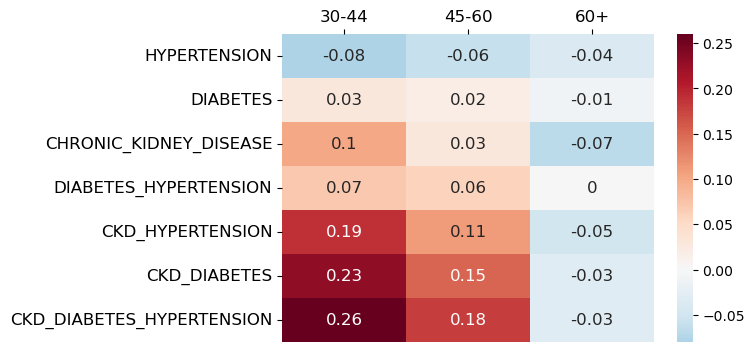

In [237]:
age_groups = ['30-44', '45-60', '60+']
result_combined_df = pd.DataFrame(columns=["Comorbidity"] + age_groups)

features = ['HYPERTENSION', 'DIABETES', 'CHRONIC_KIDNEY_DISEASE', 'DIABETES_HYPERTENSION', 'CKD_HYPERTENSION', 'CKD_DIABETES', 'CKD_DIABETES_HYPERTENSION']
for feature in features:
    row = [feature]
    for age_group in age_groups:
        if age_group == '30-44':
            df = all_30_44
        elif age_group == '45-60':
            df = all_45_60
        else:
            df = all_over_60
        tet_corr = tetrachoric_corr(df, feature)
        row.append(tet_corr)
    result_combined_df.loc[len(result_combined_df)] = row

plt.figure(figsize=(6, 4))
ax = sns.heatmap(result_combined_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(age_groups, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**The correlations between comorbidities and mortality are the highest in the youngest group (ages 30-44), lower in the 45-60 age group, and nonexistent in the oldest group (above 60). In the younger age groups, the co-occurrence of two comorbidities (e.g., diabetes and chronic kidney disease (CKD)) shows a stronger correlation with mortality than the sum of their individual correlations. This suggests that these two comorbidities may have a synergistic effect on mortality, where their combined presence increases the risk of mortality more than the additive effects of each condition alone.**

**This pattern implies that the two comorbidities might be interrelated in ways that amplify their impact on mortality. For instance, diabetes can lead to kidney damage, and CKD can complicate diabetes management, resulting in a compounded risk.**

In [228]:
# Ensure you're working on a copy of the DataFrame
MED_UNIT_9 = MED_UNIT_9.copy()

# Create columns with boolean conditions, then explicitly cast to integers
MED_UNIT_9['DIABETES_HYPERTENSION'] = ((MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)).astype(int)

MED_UNIT_9['CVD_DIABETES_HYPERTENSION'] = ((MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1) & (MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1)).astype(int)

MED_UNIT_9['CVD_DIABETES'] = ((MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1)).astype(int)

MED_UNIT_9['CVD_HYPERTENSION'] = ((MED_UNIT_9['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)).astype(int)

MED_UNIT_9['OBESITY_DIABETES_HYPERTENSION'] = ((MED_UNIT_9['OBESITY'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1) & (MED_UNIT_9['DIABETES'] == 1)).astype(int)

MED_UNIT_9['CKD_DIABETES'] = ((MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['DIABETES'] == 1)).astype(int)

MED_UNIT_9['CKD_HYPERTENSION'] = ((MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)).astype(int)

MED_UNIT_9['CKD_DIABETES_HYPERTENSION'] = ((MED_UNIT_9['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_9['DIABETES'] == 1) & (MED_UNIT_9['HYPERTENSION'] == 1)).astype(int)


C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\414745991.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


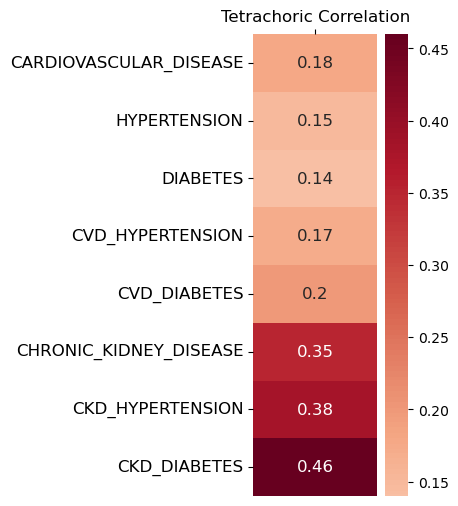

In [229]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_9_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_9, feature)
    MED_UNIT_9_df = pd.concat([MED_UNIT_9_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_9_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**When all ages are analyzed as one group in medical unit 9 (relatively low mortality rate: 30%), the co-occurrence of two comorbidities is lower than the sum of individual correlations. This is likely due to the lack of any correlations in the oldest group, which has the highest mortality rate. Nevertheless, in the case of the co-occurrence of chronic kidney disease with hypertension or diabetes, the correlations are moderately strong (0.38 and 0.46, respectively).**

In [230]:

MED_UNIT_6['DIABETES_HYPERTENSION'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['DIABETES_HYPERTENSION'] = MED_UNIT_6['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CVD_DIABETES_HYPERTENSION'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1) & (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_6['CVD_DIABETES_HYPERTENSION'] = MED_UNIT_6['CVD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CVD_DIABETES'] = (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_6['CVD_DIABETES'] = MED_UNIT_6['CVD_DIABETES'].astype(int)

MED_UNIT_6['CVD_HYPERTENSION'] = (MED_UNIT_6['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CVD_HYPERTENSION'] = MED_UNIT_6['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'] = (MED_UNIT_6['OBESITY'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1) & (MED_UNIT_6['DIABETES'] == 1)
MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'] = MED_UNIT_6['OBESITY_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6['CKD_DIABETES'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['DIABETES'] == 1)
MED_UNIT_6['CKD_DIABETES'] = MED_UNIT_6['CKD_DIABETES'].astype(int)

MED_UNIT_6['CKD_HYPERTENSION'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CKD_HYPERTENSION'] = MED_UNIT_6['CKD_HYPERTENSION'].astype(int)

MED_UNIT_6['CKD_DIABETES_HYPERTENSION'] = (MED_UNIT_6['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_6['DIABETES'] == 1) & (MED_UNIT_6['HYPERTENSION'] == 1)
MED_UNIT_6['CKD_DIABETES_HYPERTENSION'] = MED_UNIT_6['CKD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_6

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,AGE_GROUP,PREGNANT,SMOKER,...,OTHER_DISEASE,MEDICAL_UNIT,DIABETES_HYPERTENSION,CVD_DIABETES_HYPERTENSION,CVD_DIABETES,CVD_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
50579,1,1,1.0,1.0,1,83,female,60+,0.0,0.0,...,NaN,6,1,1,1,1,0,0,0,0
50580,1,1,1.0,1.0,1,41,male,30-44,NaN,0.0,...,1.0,6,1,0,0,1,0,0,0,0
50581,1,0,NaN,NaN,1,58,male,45-60,NaN,0.0,...,0.0,6,0,0,0,0,0,0,0,0
50582,1,1,0.0,0.0,1,82,female,60+,0.0,0.0,...,0.0,6,0,0,0,0,0,0,0,0
50583,1,1,0.0,0.0,1,59,female,45-60,0.0,0.0,...,0.0,6,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60577,1,1,0.0,0.0,0,62,female,60+,0.0,1.0,...,0.0,6,1,1,1,1,0,0,0,0
60578,1,0,NaN,NaN,0,32,female,30-44,0.0,0.0,...,0.0,6,0,0,0,0,0,0,0,0
60579,1,0,NaN,NaN,0,32,male,30-44,NaN,0.0,...,0.0,6,0,0,0,0,0,0,0,0
60580,1,0,NaN,NaN,0,60,female,60+,0.0,0.0,...,0.0,6,1,0,0,1,0,0,0,0


C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\1394317908.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


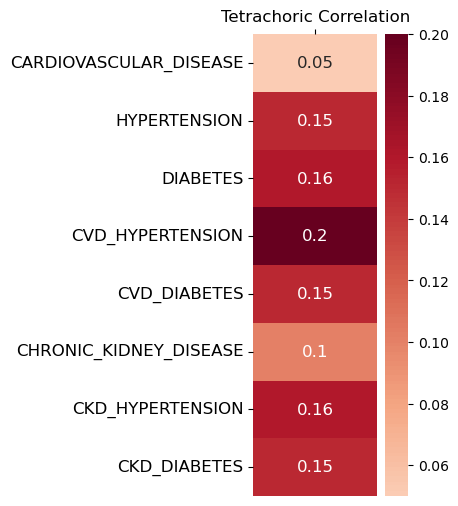

In [231]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_6_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_6, feature)
    MED_UNIT_6_df = pd.concat([MED_UNIT_6_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_6_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**In the medical unit with a moderate mortality rate (50%), the correlations between combined comorbidities and mortality are lower compared to those in the unit with a lower mortality rate (30%).**

In [232]:

MED_UNIT_4['DIABETES_HYPERTENSION'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['DIABETES_HYPERTENSION'] = MED_UNIT_4['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CVD_DIABETES_HYPERTENSION'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1) & (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_4['CVD_DIABETES_HYPERTENSION'] = MED_UNIT_4['CVD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CVD_DIABETES'] = (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1)
MED_UNIT_4['CVD_DIABETES'] = MED_UNIT_4['CVD_DIABETES'].astype(int)

MED_UNIT_4['CVD_HYPERTENSION'] = (MED_UNIT_4['CARDIOVASCULAR_DISEASE'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CVD_HYPERTENSION'] = MED_UNIT_4['DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'] = (MED_UNIT_4['OBESITY'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1) & (MED_UNIT_4['DIABETES'] == 1)
MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'] = MED_UNIT_4['OBESITY_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4['CKD_DIABETES'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['DIABETES'] == 1)
MED_UNIT_4['CKD_DIABETES'] = MED_UNIT_4['CKD_DIABETES'].astype(int)

MED_UNIT_4['CKD_HYPERTENSION'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CKD_HYPERTENSION'] = MED_UNIT_4['CKD_HYPERTENSION'].astype(int)

MED_UNIT_4['CKD_DIABETES_HYPERTENSION'] = (MED_UNIT_4['CHRONIC_KIDNEY_DISEASE'] == 1) & (MED_UNIT_4['DIABETES'] == 1) & (MED_UNIT_4['HYPERTENSION'] == 1)
MED_UNIT_4['CKD_DIABETES_HYPERTENSION'] = MED_UNIT_4['CKD_DIABETES_HYPERTENSION'].astype(int)

MED_UNIT_4

,COVID_TEST_RESULT,HOSPITALIZED,INTUBED,ADMITTED_TO_ICU,DEAD,AGE,SEX,AGE_GROUP,PREGNANT,SMOKER,...,OTHER_DISEASE,MEDICAL_UNIT,DIABETES_HYPERTENSION,CVD_DIABETES_HYPERTENSION,CVD_DIABETES,CVD_HYPERTENSION,OBESITY_DIABETES_HYPERTENSION,CKD_DIABETES,CKD_HYPERTENSION,CKD_DIABETES_HYPERTENSION
4389,1,1,0.0,0.0,1,56,male,45-60,NaN,0.0,...,0.0,4,1,1,1,1,0,1,1,1
4390,1,1,1.0,0.0,1,74,male,60+,NaN,0.0,...,0.0,4,0,0,0,0,0,0,0,0
4391,1,1,0.0,0.0,1,56,male,45-60,NaN,0.0,...,0.0,4,0,0,0,0,0,1,0,0
4392,1,1,1.0,0.0,1,78,male,60+,NaN,0.0,...,0.0,4,1,0,0,1,0,1,1,1
4393,1,1,0.0,0.0,1,57,male,45-60,NaN,1.0,...,0.0,4,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48716,1,1,1.0,0.0,0,71,male,60+,NaN,0.0,...,0.0,4,0,0,0,0,0,0,0,0
48717,1,1,0.0,0.0,0,31,female,30-44,0.0,0.0,...,1.0,4,0,0,0,0,0,0,0,0
48718,1,0,NaN,NaN,0,55,male,45-60,NaN,0.0,...,1.0,4,0,0,0,0,0,0,0,0
48719,1,1,0.0,0.0,0,71,female,60+,0.0,NaN,...,NaN,4,0,0,0,0,0,0,0,0


C:\Users\elzbi\AppData\Local\Temp\ipykernel_18300\2218200705.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])


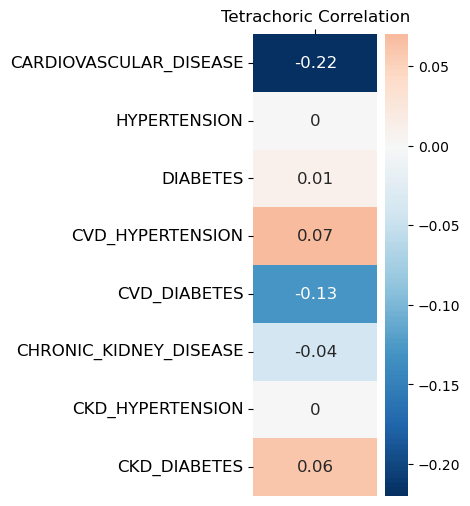

In [223]:
features = ['CARDIOVASCULAR_DISEASE', 'HYPERTENSION', 'DIABETES' , 'CVD_HYPERTENSION', 'CVD_DIABETES', 
            'CHRONIC_KIDNEY_DISEASE', 'CKD_HYPERTENSION', 'CKD_DIABETES']

# Create the result DataFrame
MED_UNIT_4_df = pd.DataFrame(columns=['Comorbidity', 'Tetrachoric Correlation'])

# Calculate the tetrachoric correlations and populate the DataFrame
for feature in features:
    tet_corr = tetrachoric_corr(MED_UNIT_4, feature)
    MED_UNIT_4_df = pd.concat([MED_UNIT_4_df, pd.DataFrame({'Comorbidity': [feature], 'Tetrachoric Correlation': [tet_corr]})])

# Create the heatmap
plt.figure(figsize=(2, 6))
ax = sns.heatmap(MED_UNIT_4_df.set_index('Comorbidity'), annot=True, cmap='RdBu_r', center=0, annot_kws={'size': 12})
ax.xaxis.tick_top()
ax.set_xticklabels(ax.get_xticklabels(), ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

**In the medical unit with the highest mortality rate (80%), there is no correlation between comorbidities and mortality, even when they co-occur.**

### **Summary of Results and Conclusions:**

The analysis shows that the correlation between comorbidities (obesity, diabetes, chronic kidney disease (CKD), and hypertension) and mortality varies depending on age and the medical unit:

1. In younger groups (30-44), the co-occurrence of comorbidities has a stronger correlation with mortality than the sum of individual correlations, indicating a synergistic effect. However, in older age groups (45-60 and above 60), these correlations weaken, with no significant correlation observed in the eldest group, which has the highest mortality rate.

2. In medical units with lower mortality rates (30%), co-occurrence of comorbidities shows a stronger correlation with mortality. In the unit with a moderate mortality rate (50%), these correlations are weaker, and in the unit with the highest mortality rate (80%), no correlation is found, even when comorbidities co-occur.

This suggests that while comorbidities like CKD and diabetes can have a compounded effect on mortality in certain groups, their impact diminishes in high-mortality environments, possibly due to more complex factors such as resource shortages and overwhelmed medical staff.

#### **Possible Interpretation:**

In high-mortality hospitals, mortality may be driven more by limited resources and overwhelmed medical staff, making comorbidities less influential. Patients with or without comorbidities may have experienced similar outcomes due to insufficient care. In contrast, lower-mortality hospitals, where patients likely received better care, showed a clearer impact of comorbidities on mortality outcomes, as these units likely had sufficient resources (e.g., ventilators, ICU beds, medications) and were less overwhelmed.

Additionally, the lack of correlation in the eldest group may be due to the high vulnerability of these patients. Many of them may have had severe comorbidities and may have died before reaching the hospital, which could skew the observed correlations.

